In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score


import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
# setting Jedha color palette as default
pio.templates["jedha"] = go.layout.Template(
    layout_colorway=["#4B9AC7", "#4BE8E0", "#9DD4F3", "#97FBF6", "#2A7FAF", "#23B1AB", "#0E3449", "#015955"]
)
pio.templates.default = "jedha"
pio.renderers.default = "svg" # to be replaced by "iframe" if working on JULIE

In [ ]:
df= pd.read_csv("/content/Walmart_Store_sales.csv")

In [ ]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
2,17.0,27-07-2012,NaN,0.0,NaN,NaN,130.719581,5.936
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092
...,...,...,...,...,...,...,...,...
145,14.0,18-06-2010,2248645.59,0.0,72.62,2.780,182.442420,8.899
146,7.0,NaN,716388.81,NaN,20.74,2.778,NaN,NaN
147,17.0,11-06-2010,845252.21,0.0,57.14,2.841,126.111903,NaN
148,8.0,12-08-2011,856796.10,0.0,86.05,3.638,219.007525,NaN


In [ ]:
# Basic stats
print("Number of rows : {}".format(df.shape[0]))
print("Number of rows : {}".format(df.shape[1]))
print()

print("Display of dataset: ")
display(df.head())
print()

print("Basics statistics: ")
data_desc = df.describe(include='all')
display(data_desc)
print()

print("Percentage of missing values: ")
print()
display(100*df.isnull().sum()/df.shape[0])
print()

print('basics info')
print()
display(df.info())

Number of rows : 150
Number of rows : 8

Display of dataset: 


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
2,17.0,27-07-2012,NaN,0.0,NaN,NaN,130.719581,5.936
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092



Basics statistics: 


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,150.000000,132,1.360000e+02,138.000000,132.000000,136.000000,138.000000,135.000000
unique,NaN,85,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,19-10-2012,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN
mean,9.866667,NaN,1.249536e+06,0.079710,61.398106,3.320853,179.898509,7.598430
std,6.231191,NaN,6.474630e+05,0.271831,18.378901,0.478149,40.274956,1.577173
min,1.000000,NaN,2.689290e+05,0.000000,18.790000,2.514000,126.111903,5.143000
25%,4.000000,NaN,6.050757e+05,0.000000,45.587500,2.852250,131.970831,6.597500
50%,9.000000,NaN,1.261424e+06,0.000000,62.985000,3.451000,197.908893,7.470000
75%,15.750000,NaN,1.806386e+06,0.000000,76.345000,3.706250,214.934616,8.150000



Percentage of missing values: 



Store            0.000000
Date            12.000000
Weekly_Sales     9.333333
Holiday_Flag     8.000000
Temperature     12.000000
Fuel_Price       9.333333
CPI              8.000000
Unemployment    10.000000
dtype: float64


basics info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         150 non-null    float64
 1   Date          132 non-null    object 
 2   Weekly_Sales  136 non-null    float64
 3   Holiday_Flag  138 non-null    float64
 4   Temperature   132 non-null    float64
 5   Fuel_Price    136 non-null    float64
 6   CPI           138 non-null    float64
 7   Unemployment  135 non-null    float64
dtypes: float64(7), object(1)
memory usage: 9.5+ KB


None

In [ ]:
df.dropna(subset=['Weekly_Sales'], inplace=True)
print("Nombre de ligne : {}".format(df.shape[0]))
print("Nombre de colonnes : {}".format(df.shape[1]))

Nombre de ligne : 136
Nombre de colonnes : 8


In [ ]:
df['Date']= pd.to_datetime(df['Date'],format='%d-%m-%Y')


df['DayOfWeek'] = df['Date'].dt.dayofweek
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

df.set_index('Date', inplace=True)
df.sort_index(inplace=True)

print("Number of rows : {}".format(df.shape[0]))
print("Number of rows : {}".format(df.shape[1]))
print()
print()
display(df)

Number of rows : 136
Number of rows : 11




,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,DayOfWeek,Day,Month,Year
Date,,,,,,,,,,,
2010-02-05,3.0,461622.22,0.0,45.71,2.572,214.424881,7.368,4.0,5.0,2.0,2010.0
2010-02-12,1.0,1641957.44,1.0,38.51,2.548,211.242170,8.106,4.0,12.0,2.0,2010.0
2010-02-12,8.0,994801.40,1.0,33.34,2.548,214.621419,6.299,4.0,12.0,2.0,2010.0
2010-02-19,15.0,660838.75,0.0,NaN,2.909,131.637000,NaN,4.0,19.0,2.0,2010.0
2010-02-19,2.0,2124451.54,0.0,39.69,2.514,210.945160,NaN,4.0,19.0,2.0,2010.0
...,...,...,...,...,...,...,...,...,...,...,...
NaT,3.0,384200.69,0.0,NaN,2.667,214.702765,NaN,NaN,NaN,NaN,NaN
NaT,18.0,1087051.26,0.0,69.75,3.815,135.446800,8.890,NaN,NaN,NaN,NaN
NaT,18.0,1048134.24,0.0,73.25,3.840,138.185710,8.535,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 136 entries, 2010-02-05 to NaT
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         136 non-null    float64
 1   Weekly_Sales  136 non-null    float64
 2   Holiday_Flag  125 non-null    float64
 3   Temperature   121 non-null    float64
 4   Fuel_Price    124 non-null    float64
 5   CPI           125 non-null    float64
 6   Unemployment  122 non-null    float64
 7   DayOfWeek     118 non-null    float64
 8   Day           118 non-null    float64
 9   Month         118 non-null    float64
 10  Year          118 non-null    float64
dtypes: float64(11)
memory usage: 12.8 KB


In [ ]:
df["DayOfWeek"].value_counts()


4.0    118
Name: DayOfWeek, dtype: int64

In [ ]:
display(df["DayOfWeek"].unique())
print()
display(df["Month"].unique())
print()
display(df["Day"].unique())

array([ 4., nan])

array([ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,  1., nan])

array([ 5., 12., 19., 26.,  2., 16., 30., 14., 28.,  4., 11., 18., 25.,
        9.,  6., 20., 27., 10., 17., 24.,  1., 15., 31.,  7., 22., 13.,
        3.,  8., 29., 23., nan])

In [ ]:
df = df.drop("DayOfWeek", axis=1)

In [ ]:
# "Supprimons les lignes contenant des valeurs invalides ou des valeurs aberrantes. Cela concerne les colonnes : Température, Prix du carburant, CPI et Taux de chômage :"
df = df[(df["Temperature"] < (df['Temperature'].mean()+(3*df['Temperature'].std()))) & (df["Temperature"] > (df['Temperature'].mean()-(3*df['Temperature'].std())))]
display(df.shape[0])
print()
df = df[(df["Fuel_Price"] < (df['Fuel_Price'].mean()+(3*df['Fuel_Price'].std()))) & (df["Fuel_Price"] > (df['Fuel_Price'].mean()-(3*df['Fuel_Price'].std())))]
display(df.shape[0])
print()
df = df[(df["CPI"] < (df['CPI'].mean()+(3*df['CPI'].std()))) & (df["CPI"] > (df['CPI'].mean()-(3*df['CPI'].std())))]
display(df.shape[0])
print()
df = df[(df["Unemployment"] < (df['Unemployment'].mean()+(3*df['Unemployment'].std()))) & (df["Unemployment"] > (df['Unemployment'].mean()-(3*df['Unemployment'].std())))]
display(df.shape[0])
print()

121

109

102

90

In [ ]:

# Separate target variable Y from features X
print("Separating labels from features...")
target_variable = "Weekly_Sales"

X = df.drop(target_variable, axis = 1)
Y = df.loc[:,target_variable]

print("...Done.")
print()

print('Y : ')
print(Y.head())
print()
print('X :')
X.head()



Separating labels from features...
...Done.

Y : 
Date
2010-02-05     461622.22
2010-02-12    1641957.44
2010-02-12     994801.40
2010-03-26    1427023.45
2010-04-02     561145.14
Name: Weekly_Sales, dtype: float64

X :


,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
Date,,,,,,,,,
2010-02-05,3.0,0.0,45.71,2.572,214.424881,7.368,5.0,2.0,2010.0
2010-02-12,1.0,1.0,38.51,2.548,211.242170,8.106,12.0,2.0,2010.0
2010-02-12,8.0,1.0,33.34,2.548,214.621419,6.299,12.0,2.0,2010.0
2010-03-26,19.0,0.0,39.07,2.963,131.863129,8.350,26.0,3.0,2010.0
2010-04-02,7.0,0.0,38.26,2.725,189.704822,8.963,2.0,4.0,2010.0


In [ ]:
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=0)
print("...Done.")
print()

Dividing into train and test sets...
...Done.



In [ ]:
categorical_features = ['Store', 'Holiday_Flag'] # Names of categorical columns in X_train/X_test
numeric_features = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month', 'Day'] # Names of numeric columns in X_train/X_test

#Preprocessings to be planned with scikit-learn
#Categorical variables : Store, Holiday_Flag
from sklearn.preprocessing import OneHotEncoder

categorical_transformer = Pipeline(
    steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first'))# missing values will be replaced by most frequent value
    ])


#Numerical variables : Temperature, Fuel_Price, CPI, Unemployment, Year, Month, Day, DayOfWeek
# Create pipeline for numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), # missing values in Age will be replaced by columns' mean
    ('scaler', StandardScaler())
])

In [ ]:
# Use ColumnTranformer to make a preprocessor object that describes all the treatments to be done
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Preprocessings on train set
print("Performing preprocessings on train set...")
print(X_train.head())
X_train = preprocessor.fit_transform(X_train)
print('...Done.')
print(X_train[0:5,:])
print()

# Preprocessings on test set
print("Performing preprocessings on test set...")
print(X_test.head())
X_test = preprocessor.transform(X_test)
print('...Done.')
print(X_test[0:5,:])
print(X_test)

Performing preprocessings on train set...
            Store  Holiday_Flag  Temperature  Fuel_Price         CPI  \
Date                                                                   
2010-05-28    6.0           0.0        78.89       2.759  212.412888   
2010-07-09    9.0           NaN        78.51       2.642  214.656430   
2010-10-01   17.0           0.0        60.07       2.853  126.234600   
2011-12-16    4.0           0.0        36.44       3.149  129.898065   
2012-10-12   18.0           0.0        50.97       4.029  138.911700   

            Unemployment   Day  Month    Year  
Date                                           
2010-05-28         7.092  28.0    5.0  2010.0  
2010-07-09         6.442   9.0    7.0  2010.0  
2010-10-01         6.885   1.0   10.0  2010.0  
2011-12-16         5.143  16.0   12.0  2011.0  
2012-10-12         8.243  12.0   10.0  2012.0  
...Done.
[[ 1.03390548 -1.18550334  0.8162052  -0.38289613 -1.14773017 -0.4760952
   1.39348313  0.          0.      

In [ ]:
print("Train model...")
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
print("...Done.")

Train model...
...Done.


In [ ]:
Y_train_pred = regressor.predict(X_train)
Y_test_pred = regressor.predict(X_test)
print("R2 score on training set : ", r2_score(Y_train, Y_train_pred))
print("R2 score on test set : ", r2_score(Y_test, Y_test_pred))

R2 score on training set :  0.9854261176369796
R2 score on test set :  0.9229600370988106


In [ ]:
regressor.coef_

array([   -9974.65365609,   -73403.11046831,   366441.68450957,
         -68118.4016847 ,    18013.04142589,    23474.60610372,
         -51114.21367074,   255146.2317939 , -1296719.05701037,
        1437544.79034645, -1304918.36264285,    49350.24143804,
        -793454.80380186,  -840093.0700882 , -1251806.93424891,
        1065389.89398245,    15410.51672626,  1122232.04973293,
         841539.35772702,  -126887.00444841,  -908034.63142046,
         -90259.818175  ,   346770.27375333,   650106.28883882,
         467040.89967527,   -32406.69404973])

In [ ]:
#get columns_names of each coefficient
column_names = []
for name, step, features_list in preprocessor.transformers_: # loop over pipelines
    if name == 'num': # if pipeline is for numeric variables
        features = features_list # just get the names of columns to which it has been applied
    else: # if pipeline is for categorical variables
        features = step.named_steps['encoder'].get_feature_names_out(categorical_features) # get output columns names from OneHotEncoder
    column_names.extend(features) # concatenate features names

print("Names of columns corresponding to each coefficient: ", column_names)

Names of columns corresponding to each coefficient:  ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month', 'Day', 'Store_2.0', 'Store_3.0', 'Store_4.0', 'Store_5.0', 'Store_6.0', 'Store_7.0', 'Store_8.0', 'Store_9.0', 'Store_10.0', 'Store_11.0', 'Store_13.0', 'Store_14.0', 'Store_15.0', 'Store_16.0', 'Store_17.0', 'Store_18.0', 'Store_19.0', 'Store_20.0', 'Holiday_Flag_1.0']


In [ ]:
# Create a pandas DataFrame
coefs = pd.DataFrame(index = column_names, data = regressor.coef_.transpose(), columns=["coefficients"])
coefs

,coefficients
Temperature,-9.974654e+03
Fuel_Price,-7.340311e+04
CPI,3.664417e+05
Unemployment,-6.811840e+04
Year,1.801304e+04
Month,2.347461e+04
Day,-5.111421e+04
Store_2.0,2.551462e+05
Store_3.0,-1.296719e+06
Store_4.0,1.437545e+06


In [ ]:
# Compute abs() and sort values
feature_importance = abs(coefs).sort_values(by = 'coefficients')
feature_importance

,coefficients
Temperature,9.974654e+03
Store_11.0,1.541052e+04
Year,1.801304e+04
Month,2.347461e+04
Holiday_Flag_1.0,3.240669e+04
Store_6.0,4.935024e+04
Day,5.111421e+04
Unemployment,6.811840e+04
Fuel_Price,7.340311e+04
Store_17.0,9.025982e+04


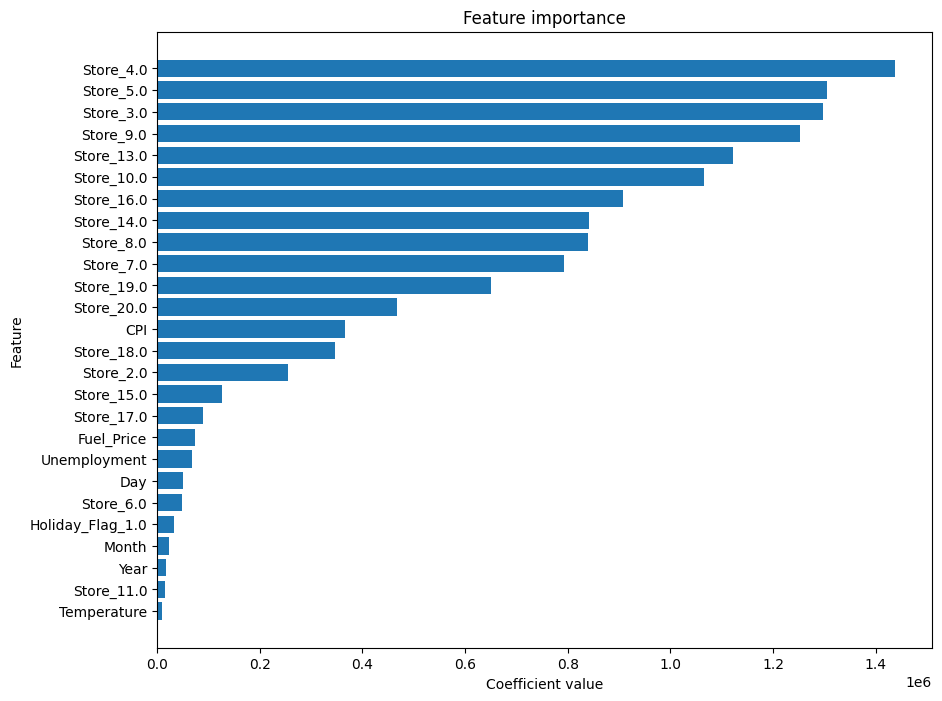

In [ ]:
# Plot coefficients
fig, ax = plt.subplots(figsize=(10, 8))
ax.barh(feature_importance.index, feature_importance.coefficients)
ax.set_xlabel('Coefficient value')
ax.set_ylabel('Feature')
ax.set_title('Feature importance')
plt.show()

In [ ]:
# Cross-validated score for a Ridge model
print("Cross-validation on Ridge...")
ridge_model = Ridge()
scores = cross_val_score(ridge_model, X_train, Y_train, cv=10)
print('The cross-validated R2-score is : ', scores.mean())
print('The standard deviation is : ', scores.std())

Cross-validation on Ridge...
The cross-validated R2-score is :  0.7682679370644199
The standard deviation is :  0.15153262755194086


In [ ]:
# Perform grid search
print("Grid search...")
regressor = Ridge()
# Grid of values to be tested
params = {
    'alpha': [0.0, 0.1, 0.5, 1.0] # 0 corresponds to no regularization
}
gridsearch = GridSearchCV(regressor, param_grid = params, cv = 3) # cv : the number of folds to be used for CV
gridsearch.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best R2 score : ", gridsearch.best_score_)

Grid search...
...Done.
Best hyperparameters :  {'alpha': 0.0}
Best R2 score :  0.897077979960213


In [ ]:
# Print R^2 scores
print("R2 score on training set : ", gridsearch.score(X_train, Y_train))
print("R2 score on test set : ", gridsearch.score(X_test, Y_test))


R2 score on training set :  0.9854261176369796
R2 score on test set :  0.9229600370988139


REGULARISATION LASSO

In [ ]:
import warnings
warnings.filterwarnings('ignore')
# Perform 3-fold cross-validation to evaluate the generalized R2 score obtained with a Ridge model
# Cross-validated score for a Lasso model
print("Cross-validation on Lasso...")
lasso_model = Lasso()
scores = cross_val_score(lasso_model, X_train, Y_train, cv=10)
print('The cross-validated R2-score is : ', scores.mean())
print('The standard deviation is : ', scores.std())

Cross-validation on Lasso...
The cross-validated R2-score is :  0.9558324468959911
The standard deviation is :  0.020236465831365458


In [ ]:
# Grid search on Lasso
# Let's focus on Lasso regularization. We'll train 4 Lasso regressors with different values of the strength 'alpha'
# and analyze the performances as well as the influence on the model's coefficients.
# Perform grid search
print("Grid search...")
lasso_model = Lasso()
# Grid of values to be tested
params = {
    'alpha': [0.0, 0.1, 0.5, 1.0] # 0 corresponds to no regularization
}
gridsearch = GridSearchCV(lasso_model, param_grid = params, cv = 10 ) # cv : the number of folds to be used for CV
gridsearch.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best R2 score : ", gridsearch.best_score_)

Grid search...
...Done.
Best hyperparameters :  {'alpha': 1.0}
Best R2 score :  0.9558324468959911


In [ ]:
# Performance assessment
# Print R^2 scores
print("R2 score on training set : ", gridsearch.score(X_train, Y_train))
print("R2 score on test set : ", gridsearch.score(X_test, Y_test))

R2 score on training set :  0.9854261176369796
R2 score on test set :  0.9229600370988139
